In [1]:
from bs4 import BeautifulSoup
import requests

In [5]:
fandom = 'Star%20Wars:%20The%20Clone%20Wars%20(2008)%20-%20All%20Media%20Types'
print('Scraping ', fandom)
url = 'https://archiveofourown.org/tags/'+str(fandom)+'/works'
print(url)


Scraping  Star%20Wars:%20The%20Clone%20Wars%20(2008)%20-%20All%20Media%20Types
https://archiveofourown.org/tags/Star%20Wars:%20The%20Clone%20Wars%20(2008)%20-%20All%20Media%20Types/works


In [6]:
#headers = {'user-agent' : header_info}
req = requests.get(url)
src = req.text
soup = BeautifulSoup(src, 'html.parser')
print(soup.text)






window.NREUM||(NREUM={});NREUM.info={"beacon":"bam.nr-data.net","errorBeacon":"bam.nr-data.net","licenseKey":"232243a405","applicationID":"129290979","transactionName":"cVtXEUpbWFxdQhkUXEBfSkpRWlBVQA==","queueTime":0,"applicationTime":143,"agent":""}
(window.NREUM||(NREUM={})).loader_config={licenseKey:"232243a405",applicationID:"129290979"};window.NREUM||(NREUM={}),__nr_require=function(e,n,t){function r(t){if(!n[t]){var i=n[t]={exports:{}};e[t][0].call(i.exports,function(n){var i=e[t][1][n];return r(i||n)},i,i.exports)}return n[t].exports}if("function"==typeof __nr_require)return __nr_require;for(var i=0;i<t.length;i++)r(t[i]);return r}({1:[function(e,n,t){function r(){}function i(e,n,t){return function(){return o(e,[u.now()].concat(f(arguments)),n?null:this,t),n?void 0:this}}var o=e("handle"),a=e(4),f=e(5),c=e("ee").get("tracer"),u=e("loader"),s=NREUM;"undefined"==typeof window.newrelic&&(newrelic=s);var p=["setPageViewName","setCustomAttribute","setErrorHandler","finished","ad

In [ ]:
#url = 'http://archiveofourown.org/works/'+str(22336816)+'/kudos'  
url = 'http://archiveofourown.org/works/'+str(14737352)+'/kudos' 
#url = 'http://archiveofourown.org/works/'+str(22336817)+'/kudos' # 404
headers = {'user-agent' : 'Homemade Bot; rebecca.sanjabi@gmail.com'}
    
req = requests.get(url, headers=headers)
src = req.text
soup = BeautifulSoup(src, 'html.parser')
print(url)

In [ ]:
def get_kudos(soup):
    try:
        my_list = soup.find(id="kudos").find_all('a')
        secondary_list = [x.text for x in set(my_list)]
        print("try")
    except AttributeError as e:
        print("except")
        return []
    else:
        print("else")
        return secondary_list

In [ ]:
get_kudos(soup)

In [ ]:
if req.status_code != 200:
    print('Access Denied')
my_kudo_list = get_kudos(soup)
unique_list = sorted(my_kudo_list)
for el in unique_list:
    print(el)
print(len(unique_list))

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../data/swr_fanworks/fanworks_kudos2.csv')

In [3]:
df.head()

,user,work_id
0,klutzyelf,3104510
1,Ello_its_meme,3104510
2,JadedBlade,3104510
3,Moony_PirateKing,3104510
4,EgoBang07,3104510


In [20]:
df['user'].value_counts()

LokiLaufeysonLove    917
annastronaut         685
cannedpeaches        662
EyeLoch              649
LuaKitsune           595
                    ... 
AndrasteLuna           1
Cloveroftheleaf        1
incarnadinedreams      1
JediMasterDomino       1
Moonraykir             1
Name: user, Length: 18096, dtype: int64

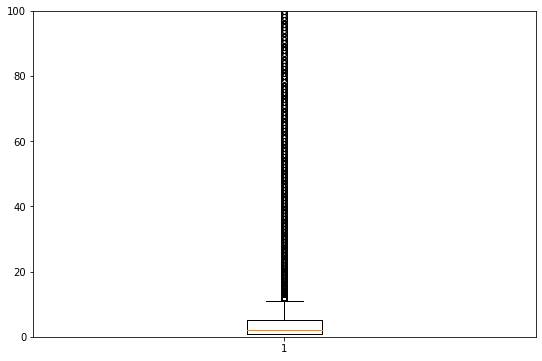

In [12]:
import matplotlib.pyplot as plt
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

#ax.set_xticklabels(['English', 'Polski','Russkii'])
#ax.set_xlabel(metric + ' and Languages')
ax.set_ylim([0, 100])

# Create the boxplot
bp = ax.boxplot(df['user'].value_counts())

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

plt.show()

In [ ]:
df.loc[df['user']=='pepoluan']

In [ ]:
df.info()

In [ ]:
len(df['work_id'].unique())

In [ ]:
len(df['user'].unique())

In [ ]:
columns_titles = ["work_id","user"]
df2=df.reindex(columns=columns_titles)

In [ ]:
df2.head()

In [ ]:
df2.to_csv('../data/swr_fanworks/fanworks_kudos2.csv', index=False)

In [ ]:
def my_func(var, var2):
    var = var + 3
    var2 = var2/4
    print(f"Inside function var value: {var}")
    
    return var

In [ ]:
var = 1
var2 = 4
print(f"Prior to function var value: {var}")
my_func(var, var2)
print(f"Post function var value: {var}")


In [ ]:
def reassign(list):
  list = [0, 1]

def append(list):
  list.append(1)

list = [0]
print(list)
reassign(list)
print(list)
append(list)
print(list)

In [ ]:
listA = [0]
listB = listA
listB.append(1)
print(listA)

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline

plt.style.use('bmh')
pd.options.display.float_format = '{:,.0f}'.format
pd.set_option("display.max_columns", 40)

In [22]:
df = pd.read_csv('../data/fanfics_metadata.csv')
cols_with_missing = [col for col in df.columns if df[col].isnull().any()]
cols_with_missing

['category',
 'relationship',
 'character',
 'additional tags',
 'words',
 'comments',
 'kudos',
 'bookmarks',
 'hits']

In [23]:
df['category'].fillna('No Category Specified', inplace=True)
df['relationship'].fillna('No Relationship Specified', inplace=True)
df['character'].fillna('No Character Specified', inplace=True)
df['additional tags'].fillna('No Additional Tags Specified', inplace=True)
df['words'].fillna(0, inplace=True)
df['comments'].fillna(0, inplace=True)
df['kudos'].fillna(0, inplace=True)
df['bookmarks'].fillna(0, inplace=True)
df['hits'].fillna(0, inplace=True)

In [26]:
df['kudos'].describe()

count   4,320
mean       69
std       107
min         0
25%        18
50%        40
75%        81
max     1,917
Name: kudos, dtype: float64

In [37]:
df['kudos'].value_counts().sort_values()

608     1
333     1
354     1
390     1
204     1
       ..
12     66
4      67
5      70
8      70
6      75
Name: kudos, Length: 376, dtype: int64

In [41]:
df.loc[df['kudos'] != 0].count()

work_id            4290
title              4290
rating             4290
category           4290
fandom             4290
relationship       4290
character          4290
additional tags    4290
language           4290
published          4290
status             4290
status date        4290
words              4290
chapters           4290
comments           4290
kudos              4290
bookmarks          4290
hits               4290
dtype: int64

In [49]:
from scipy.sparse import csr_matrix

docs = [["hello", "world", "hello"], ["goodbye", "cruel", "world"]]
indptr = [0]
indices = []
data = []
vocabulary = {}
for d in docs:
    for term in d:
        index = vocabulary.setdefault(term, len(vocabulary))
        indices.append(index)
        data.append(1)
        indptr.append(len(indices))
        print(f"term: {term} index: {index} indices: {indices} data: {data} vocab: {vocabulary}")
csr_matrix((data, indices, indptr), dtype=int).toarray()


term: hello index: 0 indices: [0] data: [1] vocab: {'hello': 0}
term: world index: 1 indices: [0, 1] data: [1, 1] vocab: {'hello': 0, 'world': 1}
term: hello index: 0 indices: [0, 1, 0] data: [1, 1, 1] vocab: {'hello': 0, 'world': 1}
term: goodbye index: 2 indices: [0, 1, 0, 2] data: [1, 1, 1, 1] vocab: {'hello': 0, 'world': 1, 'goodbye': 2}
term: cruel index: 3 indices: [0, 1, 0, 2, 3] data: [1, 1, 1, 1, 1] vocab: {'hello': 0, 'world': 1, 'goodbye': 2, 'cruel': 3}
term: world index: 1 indices: [0, 1, 0, 2, 3, 1] data: [1, 1, 1, 1, 1, 1] vocab: {'hello': 0, 'world': 1, 'goodbye': 2, 'cruel': 3}


array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]])

TypeError: 'property' object is not callable

In [51]:
str = '255.255.255.255'
str.replace('.', '[.]')

'255[.]255[.]255[.]255'